 ### Selamat datang di analisis pasar kerja untuk posisi analis data! Proyek ini dibuat untuk membantu kita memahami pasar kerja dengan lebih baik. Di sini, kita akan membahas keterampilan yang paling dibutuhkan dan paling menguntungkan bagi analis data, sehingga kita bisa menemukan peluang kerja yang terbaik.

### Data yang saya guanakan berasal dari "Kursus Python Luke Barousse", yang jadi dasar untuk analisis ini. Data ini berisi informasi detail tentang jabatan, gaji, lokasi, dan keterampilan penting. Lewat serangkaian skrip Python, aku mengeksplorasi beberapa pertanyaan utama, seperti keterampilan yang paling dibutuhkan, tren gaji, dan hubungan antara permintaan dan gaji dalam analisis data.

sekali lagi terimakasih untuk Luke Barousse yang sudah membantu saya menyelesaikan kursus ini😭.
.
.
.
.

#### Pertama kita akan mengimport library-library yang kita butuhkan.
#### jika teman-teman belum memilikinya bisa di install terlebih dahulu menggunakan pip install "nama library".
#### contoh : pip install pandas

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset
dataset = load_dataset('lukebarousse/data_jobs')

c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df = dataset['train'].to_pandas()
df.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


##### **df.info()** dapat kita gunakan untuk meng-cek tipe data pada tiap-tiap kolom

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   job_title_short        785741 non-null  object 
 1   job_title              785740 non-null  object 
 2   job_location           784696 non-null  object 
 3   job_via                785733 non-null  object 
 4   job_schedule_type      773074 non-null  object 
 5   job_work_from_home     785741 non-null  bool   
 6   search_location        785741 non-null  object 
 7   job_posted_date        785741 non-null  object 
 8   job_no_degree_mention  785741 non-null  bool   
 9   job_health_insurance   785741 non-null  bool   
 10  job_country            785692 non-null  object 
 11  salary_rate            33067 non-null   object 
 12  salary_year_avg        22003 non-null   float64
 13  salary_hour_avg        10662 non-null   float64
 14  company_name           785723 non-nu

#### kita ubah tipe data **job_posted_date** menjadi datetime

In [5]:
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

### pertama kita coba membersihkan data nan pada kolom **['salary_rate']**

In [6]:
df_salary = df.dropna(subset=['salary_rate'])
df_salary.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
28,Data Scientist,CRM Data Specialist,"San José Province, San José, Costa Rica",via Ai-Jobs.net,Full-time,False,Costa Rica,2023-08-01 13:37:57,False,False,Costa Rica,year,109500.0,NaN,Netskope,"['gdpr', 'excel']","{'analyst_tools': ['excel'], 'libraries': ['gd..."
43,Senior Data Engineer,Sr SQL Database Engineer with Data Warehouse /...,None,via LinkedIn,Contractor,False,"Texas, United States",2023-09-13 13:06:55,True,False,United States,hour,NaN,97.5,Phaxis,"['sql', 'sql server']","{'databases': ['sql server'], 'programming': [..."
51,Senior Data Engineer,Senior Data Engineer,Anywhere,via LinkedIn,Contractor,True,"Illinois, United States",2023-06-21 13:09:39,False,False,United States,hour,NaN,72.5,Aditi Consulting,"['python', 'java', 'aws', 'databricks', 'spark']","{'cloud': ['aws', 'databricks'], 'libraries': ..."
77,Data Engineer,Data Engineer,"Arlington, VA",via LinkedIn,Full-time,False,Sudan,2023-06-26 14:22:54,False,False,Sudan,year,140000.0,NaN,Intelletec,"['mongodb', 'mongodb', 'python', 'r', 'sql', '...","{'analyst_tools': ['tableau'], 'cloud': ['orac..."
92,Data Engineer,Remote - Data Engineer - Permanent - W2,Anywhere,via LinkedIn,Full-time,True,"Illinois, United States",2023-02-21 13:29:59,False,True,United States,year,120000.0,NaN,Apex Systems,"['sql', 'python']","{'programming': ['sql', 'python']}"


#### selain menghapus nilai **NaN**, kita juga bisa meng-isi nilai **NaN** dengan niali rata-rata. namun tentu saja hal ini tergantung situasi yang sesuai dengan kebutuhan

In [7]:
df_filled = df.copy()
salary_hour_median = df_filled['salary_hour_avg'].median()
salary_year_median = df_filled['salary_year_avg'].median()

df_filled['salary_hour_avg'] = df_filled['salary_hour_avg'].fillna(salary_hour_median)
df_filled['salary_year_avg'] = df_filled['salary_year_avg'].fillna(salary_year_median)

In [8]:
df_filled.loc[:5, 'salary_year_avg':'salary_hour_avg']

,salary_year_avg,salary_hour_avg
0,115000.0,45.98
1,115000.0,45.98
2,115000.0,45.98
3,115000.0,45.98
4,115000.0,45.98
5,115000.0,45.98


#### Pada saat membersihkan data selain data **NaN** ada juga dapa yang **duplicat**.

In [105]:
df_unique = df_filled
df_unique = df_unique.drop_duplicates()
print(len(df_unique))

785640


In [11]:
df_unique = df_unique.drop_duplicates(subset=['job_title','company_name'])
print(len(df_unique))

508042


#### Fungsi **pivot_table** di pandas sangat berguna untuk membuat tabel pivot yang memudahkan dalam menganalisis dan merangkum data.
#### dengan menggunakan **pivot_table** kita dapat mengatur index, colom dan juga value sesuai dengan kebutuhan

In [12]:
df.pivot_table(index='job_country', columns='job_title_short', values='salary_year_avg', aggfunc='median')

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_country,,,,,,,,,,
Albania,NaN,NaN,49950.00,NaN,69981.25,NaN,NaN,NaN,157500.0,NaN
Algeria,NaN,NaN,44100.00,45000.0,NaN,NaN,NaN,NaN,NaN,NaN
Argentina,71100.0,197500.0,92771.75,96773.0,71000.00,101029.0,NaN,147500.0,NaN,174500.0
Armenia,NaN,NaN,100500.00,48750.0,NaN,87021.0,NaN,NaN,NaN,NaN
Australia,70000.0,110000.0,109500.00,106712.5,139216.00,101029.0,50640.0,147500.0,157500.0,118350.0
...,...,...,...,...,...,...,...,...,...,...
Uruguay,NaN,NaN,100500.00,NaN,NaN,50000.0,NaN,NaN,57500.0,NaN
Uzbekistan,NaN,NaN,NaN,NaN,30750.00,NaN,NaN,NaN,NaN,NaN
Vietnam,79200.0,NaN,75550.00,96773.0,70000.00,57600.0,105837.5,147500.0,79200.0,53600.0


In [13]:
df.groupby(['job_title_short','job_country'])['salary_year_avg'].median() # groupby tidak bisa seperti pivot_table

job_title_short    job_country
Business Analyst   Afghanistan        NaN
                   Albania            NaN
                   Algeria            NaN
                   Angola             NaN
                   Argentina      71100.0
                                   ...   
Software Engineer  Venezuela          NaN
                   Vietnam        53600.0
                   Yemen              NaN
                   Zambia             NaN
                   Zimbabwe           NaN
Name: salary_year_avg, Length: 1387, dtype: float64

# MEMBUAT BARCHART

In [14]:
top_countries = df['job_country'].value_counts().head(6).index # mengambil 6 negara dengan pekerjaan terbanyak
top_countries

Index(['United States', 'India', 'United Kingdom', 'France', 'Germany',
       'Spain'],
      dtype='object', name='job_country')

In [15]:
top_salary_country = df.pivot_table(index='job_country', columns='job_title_short', values='salary_year_avg', aggfunc='median')
top_salary_country

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_country,,,,,,,,,,
Albania,NaN,NaN,49950.00,NaN,69981.25,NaN,NaN,NaN,157500.0,NaN
Algeria,NaN,NaN,44100.00,45000.0,NaN,NaN,NaN,NaN,NaN,NaN
Argentina,71100.0,197500.0,92771.75,96773.0,71000.00,101029.0,NaN,147500.0,NaN,174500.0
Armenia,NaN,NaN,100500.00,48750.0,NaN,87021.0,NaN,NaN,NaN,NaN
Australia,70000.0,110000.0,109500.00,106712.5,139216.00,101029.0,50640.0,147500.0,157500.0,118350.0
...,...,...,...,...,...,...,...,...,...,...
Uruguay,NaN,NaN,100500.00,NaN,NaN,50000.0,NaN,NaN,57500.0,NaN
Uzbekistan,NaN,NaN,NaN,NaN,30750.00,NaN,NaN,NaN,NaN,NaN
Vietnam,79200.0,NaN,75550.00,96773.0,70000.00,57600.0,105837.5,147500.0,79200.0,53600.0


In [16]:
top_salary_country = top_salary_country.loc[top_countries] # mengambil 6 negara terbesar
top_salary_country

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_country,,,,,,,,,,
United States,90000.0,116100.0,90000.0,125000.0,130000.0,150000.0,110000.0,150000.0,155000.0,130000.0
India,64800.0,NaN,100500.0,147500.0,114008.0,79200.0,111175.0,147500.0,149653.0,79200.0
United Kingdom,56700.0,NaN,87750.0,110000.0,105300.0,149653.0,111175.0,147500.0,157500.0,89100.0
France,89100.0,105968.0,69175.0,98301.5,88128.0,80850.0,111175.0,147500.0,157500.0,142500.0
Germany,89100.0,89100.0,103750.0,147500.0,131560.0,89100.0,111175.0,147500.0,157500.0,84975.0
Spain,86400.0,89100.0,91977.0,133000.0,88128.0,101029.0,111175.0,147500.0,157500.0,77050.0


In [17]:
top_job_titles = df['job_title_short'].value_counts().head(3).index # mengambil 3 job terbanyak
top_job_titles = top_job_titles.tolist() # kita perlu mengubahnya dari series ke list
top_job = ['Data Analyst', 'Data Engineer', 'Data Scientist'] # menulis dengan manual

In [18]:
top_salary_country = top_salary_country[top_job_titles]
top_salary_country

job_title_short,Data Analyst,Data Engineer,Data Scientist
job_country,,,
United States,90000.0,125000.0,130000.0
India,100500.0,147500.0,114008.0
United Kingdom,87750.0,110000.0,105300.0
France,69175.0,98301.5,88128.0
Germany,103750.0,147500.0,131560.0
Spain,91977.0,133000.0,88128.0


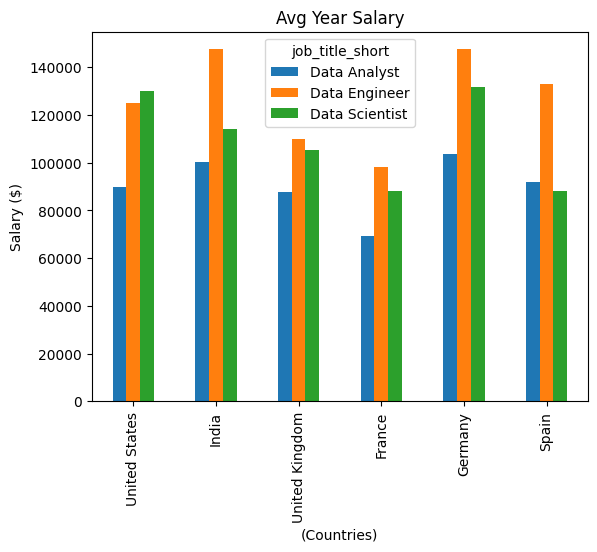

In [19]:
top_salary_country.plot(kind='bar')
plt.title('Avg Year Salary')
plt.ylabel('Salary ($)')
plt.xlabel('(Countries)')
plt.show()

#### Saya akan memfilter data yang hanya berdasarkan negara **United States** (Amerika Serikat)

In [21]:
df_usa = df.copy()

In [22]:
df_usa = df[df['job_country']=='United States'].copy()
df_usa

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"['python', 'sql', 'gcp']","{'cloud': ['gcp'], 'programming': ['python', '..."
6,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,None,NaN,NaN,"Miracle Software Systems, Inc","['sql', 'python', 'java', 'sql server', 'gcp',...","{'cloud': ['gcp', 'bigquery'], 'databases': ['..."
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","['sql', 'python', 'r', 'mongodb', 'mongodb', '...","{'analyst_tools': ['excel'], 'cloud': ['azure'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785673,Data Scientist,Asset Management Data Scientist,"New York, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-16 06:01:53,True,False,United States,None,NaN,NaN,JPMorgan Chase & Co.,None,None
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,None,NaN,NaN,"Aara Technologies, Inc","['sql', 'excel']","{'analyst_tools': ['excel'], 'programming': ['..."
785692,Data Scientist,Data Scientist- Hybrid Work Location,"Dayton, OH",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-04-21 06:02:31,False,True,United States,year,157500.0,NaN,Tenet3,"['python', 'matlab', 'r']","{'programming': ['python', 'matlab', 'r']}"
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None


#### membuat kolom **job_posted_month** untuk keperluan analisa

In [23]:
df_usa['job_posted_month'] = df_usa['job_posted_date'].dt.strftime('%B')
df_usa.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None,June
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',...",July
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"['python', 'sql', 'gcp']","{'cloud': ['gcp'], 'programming': ['python', '...",November
6,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,None,NaN,NaN,"Miracle Software Systems, Inc","['sql', 'python', 'java', 'sql server', 'gcp',...","{'cloud': ['gcp', 'bigquery'], 'databases': ['...",March
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","['sql', 'python', 'r', 'mongodb', 'mongodb', '...","{'analyst_tools': ['excel'], 'cloud': ['azure'...",April


In [24]:
df_usa_pivot = df_usa.pivot_table(index='job_posted_month', columns='job_title_short', values='salary_year_avg', aggfunc='size')
df_usa_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
April,565,40,6049,2801,4867,51,1025,781,991,112
August,903,39,6634,3269,6318,68,1186,903,1515,194
December,648,40,3979,2641,3472,119,601,689,752,212
February,447,24,6124,3060,4956,56,1258,878,1127,90
January,527,36,8494,2655,6915,60,1544,773,1552,114
July,581,39,5201,2570,4876,65,883,747,1095,153
June,446,32,5683,2893,4645,48,1009,812,1033,93
March,438,19,6218,3183,4779,59,1114,829,1150,115
May,279,20,4993,2976,4377,49,839,746,914,90


#### membuat kolom **month_numeric** untuk membantu mngurutkan bulan January-Desember yang masih rand

In [25]:
df_usa_pivot.reset_index(inplace=True)
df_usa_pivot['month_numeric'] = pd.to_datetime(df_usa_pivot['job_posted_month'], format='%B').dt.month

In [26]:
df_usa_pivot.sort_values('month_numeric', inplace=True)
df_usa_pivot

job_title_short,job_posted_month,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,month_numeric
4,January,527,36,8494,2655,6915,60,1544,773,1552,114,1
3,February,447,24,6124,3060,4956,56,1258,878,1127,90,2
7,March,438,19,6218,3183,4779,59,1114,829,1150,115,3
0,April,565,40,6049,2801,4867,51,1025,781,991,112,4
8,May,279,20,4993,2976,4377,49,839,746,914,90,5
6,June,446,32,5683,2893,4645,48,1009,812,1033,93,6
5,July,581,39,5201,2570,4876,65,883,747,1095,153,7
1,August,903,39,6634,3269,6318,68,1186,903,1515,194,8
11,September,897,50,4639,3224,4568,113,805,775,1014,228,9
10,October,932,48,5271,3015,4882,101,871,672,987,219,10


In [27]:
df_usa_pivot.set_index('job_posted_month', inplace= True)

In [28]:
df_usa_pivot.drop(columns='month_numeric', inplace=True)

In [29]:
df_usa_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114
February,447,24,6124,3060,4956,56,1258,878,1127,90
March,438,19,6218,3183,4779,59,1114,829,1150,115
April,565,40,6049,2801,4867,51,1025,781,991,112
May,279,20,4993,2976,4377,49,839,746,914,90
June,446,32,5683,2893,4645,48,1009,812,1033,93
July,581,39,5201,2570,4876,65,883,747,1095,153
August,903,39,6634,3269,6318,68,1186,903,1515,194
September,897,50,4639,3224,4568,113,805,775,1014,228


#### berikut adalah grafik garis terkait postingan pekerjaan berdasarkan tiap-tiap bulan

<Axes: xlabel='job_posted_month'>

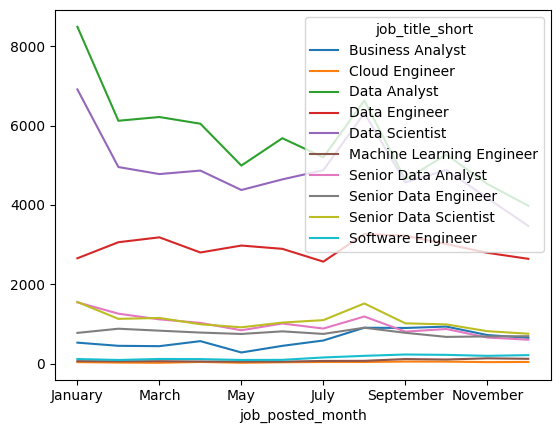

In [30]:
df_usa_pivot.plot(kind='line')

#### saya ambil top 3 job dengan permintaan terbanyak

In [31]:
top_3 = df_usa['job_title_short'].value_counts().head(3).index
top_3.tolist()

['Data Analyst', 'Data Scientist', 'Data Engineer']

Text(0, 0.5, 'Total Job')

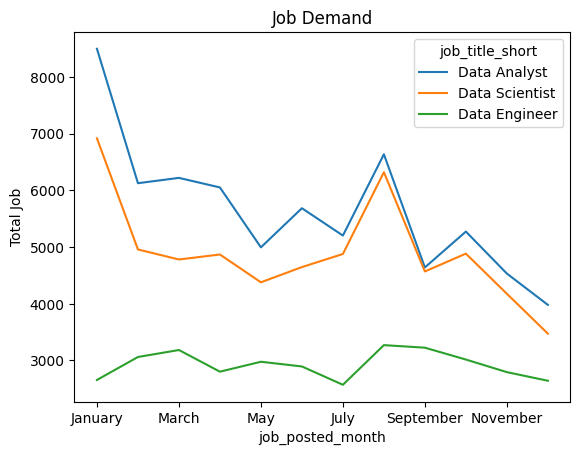

In [32]:
df_usa_pivot[top_3].plot(kind='line')
plt.title('Job Demand')
plt.ylabel('Total Job')

# MERGERING DATA

#### Selanjutnya kita akan membahas sedikit terkait method dari **merge**
##### metode merge digunakan untuk menggabungkan dua DataFrame berdasarkan kolom yang sama atau kunci tertentu. Ini mirip dengan operasi JOIN dalam SQL

In [33]:
job_data = {
    'job_id':[1,2,3,4,5],
    'job_title':['Data Scientist', 'Software Engineer', 'Product Manager', 'Marketing Director','HR Manager'],
    'company_name':['Google', 'Microsoft', 'Apple', 'Nike', 'Starbucks'],
    'job_location':['100,000+', '100,000+', '100,000+', '75,000+', '346,000+']
}

company_data = {
    'company_name': ['Google', 'Microsoft', 'Apple', 'Nike', 'Starbucks'],
    'industry': ['Technology', 'Technology', 'Technology', 'Apparel', 'Food & Beverage'],
    'company_size': ['100,000+', '100,000+', '100,000+', '75,000+', '346,000+']
}

df_jobs = pd.DataFrame(job_data)
df_companies = pd.DataFrame(company_data)

In [34]:
df_jobs

,job_id,job_title,company_name,job_location
0,1,Data Scientist,Google,"100,000+"
1,2,Software Engineer,Microsoft,"100,000+"
2,3,Product Manager,Apple,"100,000+"
3,4,Marketing Director,Nike,"75,000+"
4,5,HR Manager,Starbucks,"346,000+"


In [35]:
df_companies

,company_name,industry,company_size
0,Google,Technology,"100,000+"
1,Microsoft,Technology,"100,000+"
2,Apple,Technology,"100,000+"
3,Nike,Apparel,"75,000+"
4,Starbucks,Food & Beverage,"346,000+"


In [36]:
df_jobs.merge(df_companies, on='company_name')

,job_id,job_title,company_name,job_location,industry,company_size
0,1,Data Scientist,Google,"100,000+",Technology,"100,000+"
1,2,Software Engineer,Microsoft,"100,000+",Technology,"100,000+"
2,3,Product Manager,Apple,"100,000+",Technology,"100,000+"
3,4,Marketing Director,Nike,"75,000+",Apparel,"75,000+"
4,5,HR Manager,Starbucks,"346,000+",Food & Beverage,"346,000+"


In [37]:
df_US_software_pivot = pd.read_csv('https://lukeb.co/software_csv', index_col='job_posted_month')

df_US_software_pivot

,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,
January,13619,9827,5108,4348
February,11456,9116,7298,4284
March,11102,8178,5814,4159
April,14037,9209,7232,4220
May,12126,8864,6718,4980
June,12003,8065,5902,4781
July,11914,8061,6839,4344
August,11571,8191,7413,4104
September,14016,8447,6139,4094


In [38]:
df_us_merger = df_usa_pivot.merge(df_US_software_pivot, on='job_posted_month')

In [39]:
top_5 = df_us_merger.sum().sort_values(ascending=False).head(5).index.tolist()

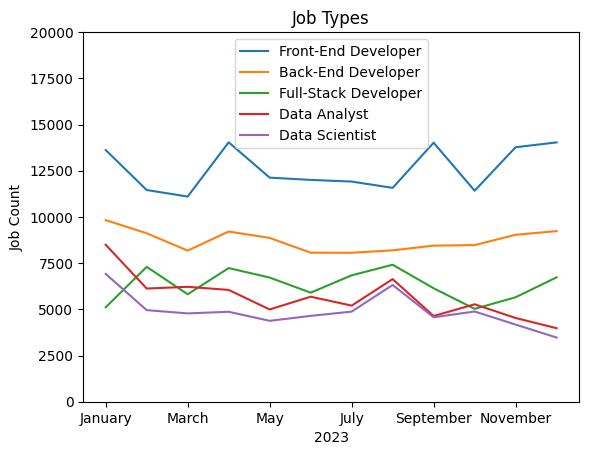

In [40]:
df_us_merger[top_5].plot(kind='line')
plt.title('Job Types')
plt.xlabel('2023')
plt.ylabel('Job Count')
plt.ylim(0,20000)
plt.show()

# CONCAT

#### Metode concat dalam pandas digunakan untuk menggabungkan dua atau lebih DataFrame atau Series secara vertikal atau horizontal

In [41]:
# Sample dataset of job postings in January
job_postings_jan = pd.DataFrame({
    'job_id': [1, 2, 3, 4, 5],
    'job_title': ['Data Scientist', 'Data Analyst', 'Machine Learning Engineer', 'Data Scientist', 'Data Engineer'],
    'company': ['Company A', 'Company B', 'Company C', 'Company D', 'Company E'],
    'job_posted_date': pd.to_datetime(['2024-01-02', '2024-01-07', '2024-01-14', '2024-01-19', '2024-01-24'])
})

job_postings_jan

,job_id,job_title,company,job_posted_date
0,1,Data Scientist,Company A,2024-01-02
1,2,Data Analyst,Company B,2024-01-07
2,3,Machine Learning Engineer,Company C,2024-01-14
3,4,Data Scientist,Company D,2024-01-19
4,5,Data Engineer,Company E,2024-01-24


In [42]:
# Sample dataset of job postings in February
job_postings_feb = pd.DataFrame({
    'job_id': [6, 7, 8, 9, 10],
    'job_title': ['Data Scientist', 'Data Analyst', 'Machine Learning Engineer', 'Data Scientist', 'Data Engineer'],
    'company': ['Company F', 'Company G', 'Company H', 'Company I', 'Company J'],
    'job_posted_date': pd.to_datetime(['2024-02-05', '2024-02-09', '2024-02-12', '2024-02-18', '2024-02-22'])
})

job_postings_feb

,job_id,job_title,company,job_posted_date
0,6,Data Scientist,Company F,2024-02-05
1,7,Data Analyst,Company G,2024-02-09
2,8,Machine Learning Engineer,Company H,2024-02-12
3,9,Data Scientist,Company I,2024-02-18
4,10,Data Engineer,Company J,2024-02-22


In [43]:
pd.concat([job_postings_jan, job_postings_feb],ignore_index=True)

,job_id,job_title,company,job_posted_date
0,1,Data Scientist,Company A,2024-01-02
1,2,Data Analyst,Company B,2024-01-07
2,3,Machine Learning Engineer,Company C,2024-01-14
3,4,Data Scientist,Company D,2024-01-19
4,5,Data Engineer,Company E,2024-01-24
5,6,Data Scientist,Company F,2024-02-05
6,7,Data Analyst,Company G,2024-02-09
7,8,Machine Learning Engineer,Company H,2024-02-12
8,9,Data Scientist,Company I,2024-02-18
9,10,Data Engineer,Company J,2024-02-22


#### Example 2

In [44]:
df['job_posted_month'] = df['job_posted_date'].dt.strftime('%b')
df.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None,Jun
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr...",Jan
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],...",Oct
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',...",Jul
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl...",Aug


In [45]:
months = df['job_posted_month'].unique()
months

array(['Jun', 'Jan', 'Oct', 'Jul', 'Aug', 'Nov', 'Mar', 'Dec', 'Apr',
       'Feb', 'Sep', 'May'], dtype=object)

In [46]:
# {month: month for month in months} # dikarenakan key dan value nya bukan sebuah dataframe kita ubah kodenya

In [47]:
dict_month = {month : df[df['job_posted_month']==month] for month in months}
dict_month['Jan']

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr...",Jan
20,Data Scientist,Data Scientist,"Zaventem, Belgium",via BeBee Belgique,Full-time,False,Belgium,2023-01-31 13:53:38,False,False,Belgium,None,NaN,NaN,Devoteam,"['r', 'python', 'sql', 'pandas', 'numpy', 'sci...","{'libraries': ['pandas', 'numpy', 'scikit-lear...",Jan
39,Data Engineer,Data Engineer,"Fort Worth, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-25 13:24:01,False,False,United States,None,NaN,NaN,Programmers.io,"['sql', 'python']","{'programming': ['sql', 'python']}",Jan
53,Data Engineer,Data Engineer,"San Mateo, CA",via LinkedIn,Full-time,False,"California, United States",2023-01-28 13:07:30,False,True,United States,None,NaN,NaN,Verkada,"['sql', 'python', 'aws', 'looker']","{'analyst_tools': ['looker'], 'cloud': ['aws']...",Jan
55,Data Scientist,Data Scientist,"São Paulo, State of São Paulo, Brazil",via BeBee,Full-time,False,Brazil,2023-01-03 23:02:27,False,False,Brazil,None,NaN,NaN,Mars,"['python', 'sql', 'azure']","{'cloud': ['azure'], 'programming': ['python',...",Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785699,Software Engineer,Simulation Engineer,"Prague, Czechia",via Trabajo.org,Full-time,False,Czechia,2023-01-16 06:35:30,False,False,Czechia,None,NaN,NaN,Ricardo Prague s.r.o.,"['powerpoint', 'excel']","{'analyst_tools': ['powerpoint', 'excel']}",Jan
785700,Data Engineer,Data Engineer Ssr/Sr,"Mexico City, CDMX, Mexico",via Trabajo.org,Full-time,False,Mexico,2023-01-12 06:19:55,True,False,Mexico,None,NaN,NaN,Tsoft,"['python', 'r', 'azure', 'aws', 'gcp', 'spark'...","{'cloud': ['azure', 'aws', 'gcp'], 'libraries'...",Jan
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None,Jan
785704,Business Analyst,Business Analyst,"Prague, Czechia",via Trabajo.org,Full-time,False,Czechia,2023-01-16 06:35:20,False,False,Czechia,None,NaN,NaN,Cleverlance,None,None,Jan


#### Concat bulan Jan, Feb, Mar (Quarter 1)

In [48]:
df_q1 = pd.concat([dict_month['Jan'],dict_month['Feb'],dict_month['Mar']],ignore_index=True)
df_q1

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
0,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr...",Jan
1,Data Scientist,Data Scientist,"Zaventem, Belgium",via BeBee Belgique,Full-time,False,Belgium,2023-01-31 13:53:38,False,False,Belgium,None,NaN,NaN,Devoteam,"['r', 'python', 'sql', 'pandas', 'numpy', 'sci...","{'libraries': ['pandas', 'numpy', 'scikit-lear...",Jan
2,Data Engineer,Data Engineer,"Fort Worth, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-25 13:24:01,False,False,United States,None,NaN,NaN,Programmers.io,"['sql', 'python']","{'programming': ['sql', 'python']}",Jan
3,Data Engineer,Data Engineer,"San Mateo, CA",via LinkedIn,Full-time,False,"California, United States",2023-01-28 13:07:30,False,True,United States,None,NaN,NaN,Verkada,"['sql', 'python', 'aws', 'looker']","{'analyst_tools': ['looker'], 'cloud': ['aws']...",Jan
4,Data Scientist,Data Scientist,"São Paulo, State of São Paulo, Brazil",via BeBee,Full-time,False,Brazil,2023-01-03 23:02:27,False,False,Brazil,None,NaN,NaN,Mars,"['python', 'sql', 'azure']","{'cloud': ['azure'], 'programming': ['python',...",Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220479,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"['bash', 'python', 'perl', 'linux', 'unix', 'k...","{'os': ['linux', 'unix'], 'other': ['kubernete...",Mar
220480,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"['sas', 'sas', 'sql', 'excel']","{'analyst_tools': ['sas', 'excel'], 'programmi...",Mar
220481,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"['powerpoint', 'excel']","{'analyst_tools': ['powerpoint', 'excel']}",Mar
220482,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"['python', 'go', 'nosql', 'sql', 'mongo', 'she...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh...",Mar


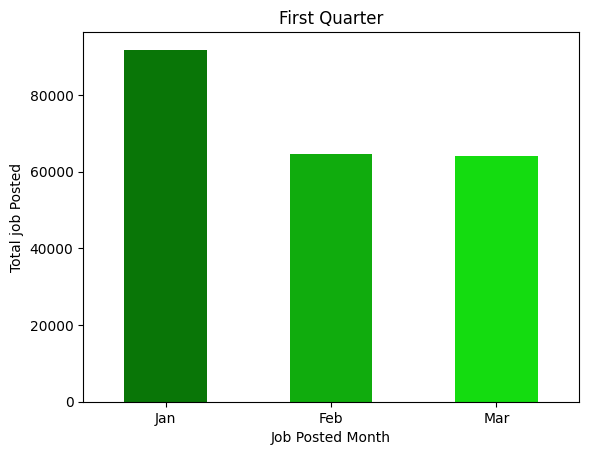

In [49]:
df_q1['job_posted_month'].value_counts().plot(kind='bar', color=['#097607','#10AC0D','#14DC10'])
plt.xticks(rotation=0)
plt.title('First Quarter')
plt.ylabel('Total job Posted')
plt.xlabel('Job Posted Month')
plt.show()

# PANDAS APLYLING FUNCTION

#### Metode apply dalam pandas digunakan untuk menerapkan fungsi atau operasi pada setiap elemen dalam kolom atau baris dari DataFrame atau Series. Ini adalah alat yang sangat berguna untuk melakukan operasi yang kompleks atau kustom pada data.

In [50]:
salary_year_inflation = df[pd.notna(df['salary_year_avg'])] # mencari nilai tanpa nilai nan
salary_year_inflation

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
28,Data Scientist,CRM Data Specialist,"San José Province, San José, Costa Rica",via Ai-Jobs.net,Full-time,False,Costa Rica,2023-08-01 13:37:57,False,False,Costa Rica,year,109500.0,NaN,Netskope,"['gdpr', 'excel']","{'analyst_tools': ['excel'], 'libraries': ['gd...",Aug
77,Data Engineer,Data Engineer,"Arlington, VA",via LinkedIn,Full-time,False,Sudan,2023-06-26 14:22:54,False,False,Sudan,year,140000.0,NaN,Intelletec,"['mongodb', 'mongodb', 'python', 'r', 'sql', '...","{'analyst_tools': ['tableau'], 'cloud': ['orac...",Jun
92,Data Engineer,Remote - Data Engineer - Permanent - W2,Anywhere,via LinkedIn,Full-time,True,"Illinois, United States",2023-02-21 13:29:59,False,True,United States,year,120000.0,NaN,Apex Systems,"['sql', 'python']","{'programming': ['sql', 'python']}",Feb
100,Data Scientist,"Data Scientist, Risk Data Mining - USDS","Mountain View, CA",via LinkedIn,Full-time,False,"California, United States",2023-07-31 13:01:18,False,True,United States,year,228222.0,NaN,TikTok,"['sql', 'r', 'python', 'express']","{'programming': ['sql', 'r', 'python'], 'webfr...",Jul
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"['python', 'r', 'alteryx', 'tableau']","{'analyst_tools': ['alteryx', 'tableau'], 'pro...",Oct
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785624,Data Engineer,Data Analytics Engineer (Hybrid),"Mt Prospect, IL",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-08-31 06:02:16,False,True,United States,year,139216.0,NaN,Bosch Group,"['go', 'python', 'r', 'sql', 'oracle', 'window...","{'analyst_tools': ['alteryx', 'power bi', 'tab...",Aug
785641,Data Engineer,Data Engineer,"New York, NY",via Dice,Full-time,False,Georgia,2023-01-04 16:36:07,True,False,United States,year,150000.0,NaN,"Engage Partners, Inc.",None,None,Jan
785648,Data Scientist,Director Data Scientist - Commercial Platforms...,"Pleasant Hill, CA",via Ai-Jobs.net,Full-time,False,"California, United States",2023-04-12 06:02:51,False,True,United States,year,221875.0,NaN,84.51°,"['python', 'azure', 'snowflake', 'spark']","{'cloud': ['azure', 'snowflake'], 'libraries':...",Apr
785682,Data Scientist,Data Scientist für datengetriebene Entwicklung...,"Reutlingen, Germany",via Ai-Jobs.net,Full-time,False,Germany,2023-03-04 06:16:08,False,False,Germany,year,157500.0,NaN,Bosch Group,"['python', 'hadoop', 'spark', 'airflow', 'kube...","{'libraries': ['hadoop', 'spark', 'airflow'], ...",Mar


#### Kita akan membuat sebuah skenario bahwa inflasi tahun ini naik sebesar 3%. untuk menggunakn salah satu kegunaan dari apply()

In [51]:
salary_year_inflation = df[pd.notna(df['salary_year_avg'])].copy()

def inflations(salary):
    return salary * 0.3

salary_year_inflation['inflation_year'] = salary_year_inflation['salary_year_avg'].apply(inflations)
salary_year_inflation[['salary_year_avg','inflation_year']]

,salary_year_avg,inflation_year
28,109500.0,32850.0
77,140000.0,42000.0
92,120000.0,36000.0
100,228222.0,68466.6
109,89000.0,26700.0
...,...,...
785624,139216.0,41764.8
785641,150000.0,45000.0
785648,221875.0,66562.5
785682,157500.0,47250.0


# CONCAT

In [52]:
# Sample dataset of job postings in January
job_postings_jan = pd.DataFrame({
    'job_id': [1, 2, 3, 4, 5],
    'job_title': ['Data Scientist', 'Data Analyst', 'Machine Learning Engineer', 'Data Scientist', 'Data Engineer'],
    'company': ['Company A', 'Company B', 'Company C', 'Company D', 'Company E'],
    'job_posted_date': pd.to_datetime(['2024-01-02', '2024-01-07', '2024-01-14', '2024-01-19', '2024-01-24'])
})
job_postings_jan


,job_id,job_title,company,job_posted_date
0,1,Data Scientist,Company A,2024-01-02
1,2,Data Analyst,Company B,2024-01-07
2,3,Machine Learning Engineer,Company C,2024-01-14
3,4,Data Scientist,Company D,2024-01-19
4,5,Data Engineer,Company E,2024-01-24


In [53]:
# Sample dataset of job postings in February
job_postings_feb = pd.DataFrame({
    'job_id': [6, 7, 8, 9, 10],
    'job_title': ['Data Scientist', 'Data Analyst', 'Machine Learning Engineer', 'Data Scientist', 'Data Engineer'],
    'company': ['Company F', 'Company G', 'Company H', 'Company I', 'Company J'],
    'job_posted_date': pd.to_datetime(['2024-02-05', '2024-02-09', '2024-02-12', '2024-02-18', '2024-02-22'])
})

job_postings_feb

,job_id,job_title,company,job_posted_date
0,6,Data Scientist,Company F,2024-02-05
1,7,Data Analyst,Company G,2024-02-09
2,8,Machine Learning Engineer,Company H,2024-02-12
3,9,Data Scientist,Company I,2024-02-18
4,10,Data Engineer,Company J,2024-02-22


** gabung **

In [54]:
pd.concat([job_postings_jan, job_postings_feb], ignore_index=True)

,job_id,job_title,company,job_posted_date
0,1,Data Scientist,Company A,2024-01-02
1,2,Data Analyst,Company B,2024-01-07
2,3,Machine Learning Engineer,Company C,2024-01-14
3,4,Data Scientist,Company D,2024-01-19
4,5,Data Engineer,Company E,2024-01-24
5,6,Data Scientist,Company F,2024-02-05
6,7,Data Analyst,Company G,2024-02-09
7,8,Machine Learning Engineer,Company H,2024-02-12
8,9,Data Scientist,Company I,2024-02-18
9,10,Data Engineer,Company J,2024-02-22


apply

In [55]:
df[pd.notna(df['salary_year_avg'])]['salary_year_avg']

28        109500.0
77        140000.0
92        120000.0
100       228222.0
109        89000.0
            ...   
785624    139216.0
785641    150000.0
785648    221875.0
785682    157500.0
785692    157500.0
Name: salary_year_avg, Length: 22003, dtype: float64

#### membuat inflasi sebesar 3% dari salary year

In [56]:
df_salary = df
df_salary = df[pd.notna(df['salary_year_avg'])].copy()

def inflation (salary):  # membuat function untuk membuat inflasi tahun 2023 adalah 3%
    return salary * 0.03

df_salary['inflation_per_year'] = df_salary['salary_year_avg'].apply(inflation)
df_salary[['salary_year_avg','inflation_per_year']]

,salary_year_avg,inflation_per_year
28,109500.0,3285.00
77,140000.0,4200.00
92,120000.0,3600.00
100,228222.0,6846.66
109,89000.0,2670.00
...,...,...
785624,139216.0,4176.48
785641,150000.0,4500.00
785648,221875.0,6656.25
785682,157500.0,4725.00


In [57]:
df.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None,Jun
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr...",Jan
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],...",Oct
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',...",Jul
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl...",Aug


#### Merubah type data str menjadi list pada **df['job_skills]** untuk kebutuhan analisis

In [58]:
type(df['job_skills'])

pandas.core.series.Series

In [59]:
import ast
type(ast.literal_eval(df['job_skills'][1]))

list

In [60]:
# cara 1
# def clean_list(skills_list): # membuat function untuk digunakan pada function apply
#     if pd.notna(skills_list): # menghapus none values
#         return ast.literal_eval(skills_list)

# df['job_skills'] = df['job_skills'].apply(clean_list)

In [61]:
type(df['job_skills'][1])

str

In [62]:
# cara kedua
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

In [63]:
type(df['job_skills'][1])

list

#### kita akan membuat skenario bahwa job_title_short yang memiliki kata 'Senior' akan mendapatkan inflasi sebesar 5%, sedangkan lainya hanya 3%

In [64]:
def project_salary(row):
    if "Senior" in row['job_title_short']:
        return 1.05 * row['salary_year_avg']
    else:
        return 1.03 * row['salary_year_avg']
    
df_salary['inflation_per_year'] = df_salary.apply(project_salary, axis=1)

In [65]:
df_salary[['job_title_short','salary_year_avg','inflation_per_year']]

,job_title_short,salary_year_avg,inflation_per_year
28,Data Scientist,109500.0,112785.00
77,Data Engineer,140000.0,144200.00
92,Data Engineer,120000.0,123600.00
100,Data Scientist,228222.0,235068.66
109,Data Analyst,89000.0,91670.00
...,...,...,...
785624,Data Engineer,139216.0,143392.48
785641,Data Engineer,150000.0,154500.00
785648,Data Scientist,221875.0,228531.25
785682,Data Scientist,157500.0,162225.00


#### Atau kita bisa juga menggunakan lambda

In [66]:
df_salary['inflation_per_year'] =df_salary.apply(lambda row: 1.05 * row['salary_year_avg'] if "Senior" in row['job_title_short'] else 1.03 * row['salary_year_avg'], axis=1)
df_salary[['job_title_short','salary_year_avg','inflation_per_year']]

,job_title_short,salary_year_avg,inflation_per_year
28,Data Scientist,109500.0,112785.00
77,Data Engineer,140000.0,144200.00
92,Data Engineer,120000.0,123600.00
100,Data Scientist,228222.0,235068.66
109,Data Analyst,89000.0,91670.00
...,...,...,...
785624,Data Engineer,139216.0,143392.48
785641,Data Engineer,150000.0,154500.00
785648,Data Scientist,221875.0,228531.25
785682,Data Scientist,157500.0,162225.00


# Explode() method

#### Metode explode dalam library pandas di Python digunakan untuk mengubah elemen-elemen yang berisi list atau array dalam DataFrame menjadi baris-baris terpisah. Ini sangat berguna ketika Anda memiliki kolom yang berisi list dan Anda ingin 'memperluas' list tersebut sehingga setiap elemen dalam list menjadi baris tersendiri.


In [67]:
data = {
    'job_title_short': ['Data Analyst', 'Data Scientist', 'Data Engineer'],
    'job_skills': [['excel', 'sql', 'python'], ['python', 'r'], ['aws', 'python', 'airflow']]
}

df_skills = pd.DataFrame(data)

df_skills

,job_title_short,job_skills
0,Data Analyst,"[excel, sql, python]"
1,Data Scientist,"[python, r]"
2,Data Engineer,"[aws, python, airflow]"


In [68]:
df_exploded = df_skills.explode('job_skills')

df_exploded


,job_title_short,job_skills
0,Data Analyst,excel
0,Data Analyst,sql
0,Data Analyst,python
1,Data Scientist,python
1,Data Scientist,r
2,Data Engineer,aws
2,Data Engineer,python
2,Data Engineer,airflow


In [69]:
df_exploded.value_counts('job_skills')

job_skills
python     3
airflow    1
aws        1
excel      1
r          1
sql        1
Name: count, dtype: int64

#### Kita terapkan ke df asli

In [70]:
df_exploded_ori = df.explode('job_skills')
df_exploded_ori.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None,Jun
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",Jan
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",Jan
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",Jan
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,nosql,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",Jan


#### Setelah di explode, kita bisa lihat bahwa skill SQL adalah yang tertinggi

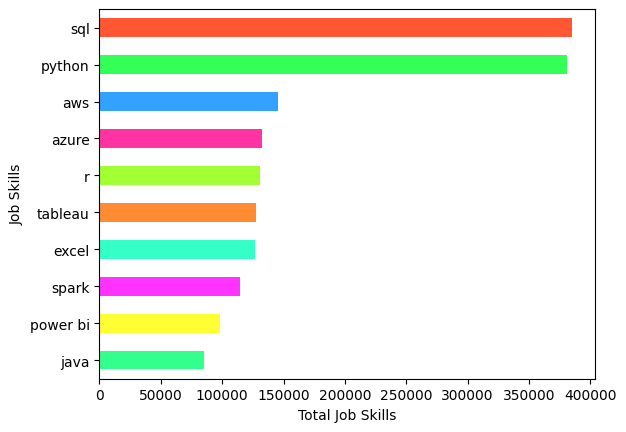

In [71]:
colors = [
    '#FF5733',  # Orange terang
    '#33FF57',  # Hijau terang
    '#33A1FF',  # Biru terang
    '#FF33A1',  # Pink terang
    '#A1FF33',  # Lime terang
    '#FF8C33',  # Oranye muda
    '#33FFC7',  # Cyan terang
    '#FF33FF',  # Magenta terang
    '#FFFF33',  # Kuning terang
    '#33FF8C'   # Mint terang
]
df_exploded_ori['job_skills'].value_counts().head(10).plot(kind='barh', color=colors)
plt.ylabel('Job Skills')
plt.xlabel('Total Job Skills')
plt.gca().invert_yaxis()
plt.show()


#### Sekarang kita cari job title berdasarkan 'Data Analyst'

In [72]:
df_exploded_ori.groupby(['job_title_short','job_skills']).size()

job_title_short    job_skills
Business Analyst   airflow        318
                   airtable        17
                   alteryx       1078
                   angular         87
                   ansible        120
                                 ... 
Software Engineer  wrike            4
                   wsl             13
                   xamarin         35
                   yarn           145
                   zoom           229
Length: 2256, dtype: int64

In [73]:
explode_data_analyst = df_exploded_ori.groupby(['job_title_short','job_skills']).size().reset_index()
type(explode_data_analyst)


pandas.core.frame.DataFrame

#### kita akan merubah 'pandas.core.frame.DataFrame' menjadi dataframe dengan cara reset index

In [74]:
explode_data_analyst = df_exploded_ori.groupby(['job_title_short','job_skills']).size().sort_values(ascending=False).reset_index(name='job_count')
explode_data_analyst

,job_title_short,job_skills,job_count
0,Data Scientist,python,113711
1,Data Engineer,sql,113130
2,Data Engineer,python,108022
3,Data Analyst,sql,92428
4,Data Scientist,sql,78982
...,...,...,...
2251,Cloud Engineer,delphi,1
2252,Senior Data Scientist,objective-c,1
2253,Senior Data Analyst,couchdb,1
2254,Cloud Engineer,haskell,1


#### Meskipun **job_title = Data Analyst** tetap saja skill SQL masih menjadi yang tertinggi. bisa kita lihat pada bar chart dibawah

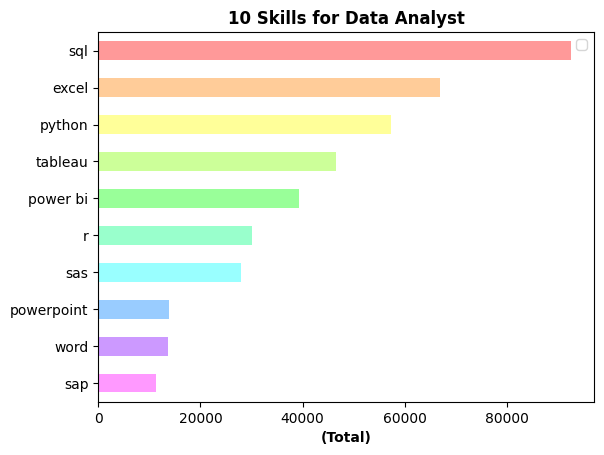

In [75]:
job_title = 'Data Analyst' # kita dapat merubahnya menjadi data engineer dll.
top10 = 10
final_data_analyst_count = explode_data_analyst[explode_data_analyst['job_title_short']==job_title].head(top10)
colors = [
    '#FF9999',  # Merah muda terang
    '#FFCC99',  # Oranye muda terang
    '#FFFF99',  # Kuning muda terang
    '#CCFF99',  # Hijau muda terang
    '#99FF99',  # Hijau terang
    '#99FFCC',  # Hijau toska terang
    '#99FFFF',  # Biru muda terang
    '#99CCFF',  # Biru terang
    '#CC99FF',  # Ungu terang
    '#FF99FF'   # Pink terang
]
final_data_analyst_count.plot(kind='barh', x='job_skills', y='job_count', color=colors)
plt.legend('')
plt.title(f'{top10} Skills for {job_title}',fontweight='bold')
plt.ylabel('')
plt.xlabel('(Total)',fontweight='bold')
plt.gca().invert_yaxis() # digunakan untuk merubah menjadi DESC
plt.show()

# Selanjutnya saya akan analisa Trending Skills


In [76]:
df_exploded_ori.head(5)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None,Jun
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",Jan
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",Jan
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",Jan
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,nosql,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",Jan


In [77]:
df_pivot_DA = df_exploded_ori
df_pivot_DA['job_posted_month2'] = df_pivot_DA['job_posted_date'].dt.month 
df_pivot_DA.pivot_table(index='job_posted_month2', columns='job_skills', aggfunc='size', fill_value=0)

job_skills,airflow,airtable,alteryx,angular,angular.js,ansible,apl,arch,asana,asp.net,...,wimi,windows,wire,word,workfront,wrike,wsl,xamarin,yarn,zoom
job_posted_month2,,,,,,,,,,,,,,,,,,,,,
1,5136,36,1509,677,19,965,12,33,71,158,...,0,1530,62,3877,8,15,10,8,255,292
2,3709,15,1150,447,14,696,8,22,51,123,...,0,1205,32,2764,13,8,10,9,186,159
3,3876,14,1092,415,16,757,21,15,50,99,...,0,1109,30,2683,3,6,5,3,185,151
4,3805,17,1068,491,14,726,23,23,38,104,...,0,1156,44,2617,13,2,2,4,157,131
5,3480,24,857,358,7,526,12,20,28,81,...,0,780,19,2044,9,4,3,3,150,128
6,3810,31,1060,398,10,608,21,15,50,91,...,0,952,42,2557,11,11,9,2,192,145
7,3685,21,1015,406,4,634,23,13,73,104,...,0,1115,48,2373,2,3,1,5,174,142
8,4035,34,1175,554,4,761,28,25,47,142,...,0,1405,45,2945,3,3,2,7,222,172
9,3289,18,923,366,7,564,14,29,37,68,...,0,960,39,2253,2,3,14,8,169,129


#### membuat total dari semua job_skills


In [78]:
df_DA = df_pivot_DA.pivot_table(index='job_posted_month2', columns='job_skills', aggfunc='size', fill_value=0) # fill_value=0 digunakan untuk mengisi nilai nan dengan 0
df_DA.loc['Total'] = df_DA.sum() # membuat row total untuk menghitung tiap2 kolom
df_DA = df_DA[df_DA.loc['Total'].sort_values(ascending=False).head(5).index] # mengambil index berdasarkan nilai terbesar
df_DA

job_skills,sql,python,aws,azure,r
job_posted_month2,,,,,
1,45774,44889,16805,15385,16351
2,32720,31943,12219,11114,11288
3,32282,31990,12458,11152,11358
4,31096,30482,11635,10557,10647
5,27096,26908,10394,9111,9339
6,31671,31216,11759,10793,10820
7,31869,31257,12017,10960,10793
8,36699,36228,13817,12193,13037
9,28926,28616,10934,10221,9248


#### kita bisa hapus row [Total]

In [79]:
df_DA = df_DA.drop('Total')
df_DA

job_skills,sql,python,aws,azure,r
job_posted_month2,,,,,
1,45774,44889,16805,15385,16351
2,32720,31943,12219,11114,11288
3,32282,31990,12458,11152,11358
4,31096,30482,11635,10557,10647
5,27096,26908,10394,9111,9339
6,31671,31216,11759,10793,10820
7,31869,31257,12017,10960,10793
8,36699,36228,13817,12193,13037
9,28926,28616,10934,10221,9248


### buat sebuah line chart

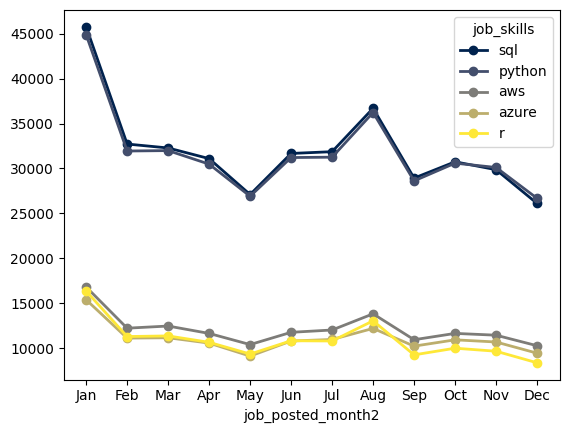

In [80]:
months = [
    "Jan",
    "Feb",
    "Mar",
    "Apr",
    "May",
    "Jun",
    "Jul",
    "Aug",
    "Sep",
    "Oct",
    "Nov",
    "Dec"
]
df_DA.iloc[:12,:5].plot(kind='line', marker='o', linewidth=2, colormap='cividis')
plt.xticks(ticks=range(12),labels=months)

plt.show()

# SUBPLOTS

#### subplots digunakan untuk membuat beberapa grafik atau subplot dalam satu figure. Ini sangat berguna ketika Anda ingin menampilkan beberapa visualisasi data dalam satu tampilan terintegrasi.

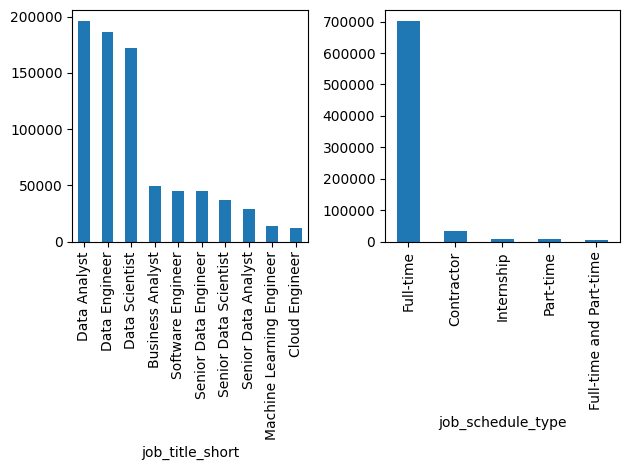

In [81]:
fig, ax = plt.subplots(1,2) #1 baris 2 kolom
df['job_title_short'].value_counts().plot(kind='bar', ax=ax[0])
df['job_schedule_type'].value_counts().head().plot(kind='bar', ax=ax[1])

fig.tight_layout()

In [82]:
df_skills = df.copy()
df_skills = df_skills.explode('job_skills')
skills_count = df_skills.groupby(['job_skills','job_title_short']).size()
skills_count

job_skills  job_title_short          
airflow     Business Analyst               318
            Cloud Engineer                 260
            Data Analyst                  2002
            Data Engineer                25505
            Data Scientist                3915
                                         ...  
zoom        Machine Learning Engineer       46
            Senior Data Analyst             86
            Senior Data Engineer           122
            Senior Data Scientist           79
            Software Engineer              229
Length: 2256, dtype: int64

In [83]:
df_skills_count = skills_count.reset_index(name="skill_count")
df_skills_count = df_skills_count.sort_values(by='skill_count', ascending=False)
df_skills_count

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
1054,mattermost,Data Scientist,1
270,clickup,Machine Learning Engineer,1
797,heroku,Senior Data Analyst,1


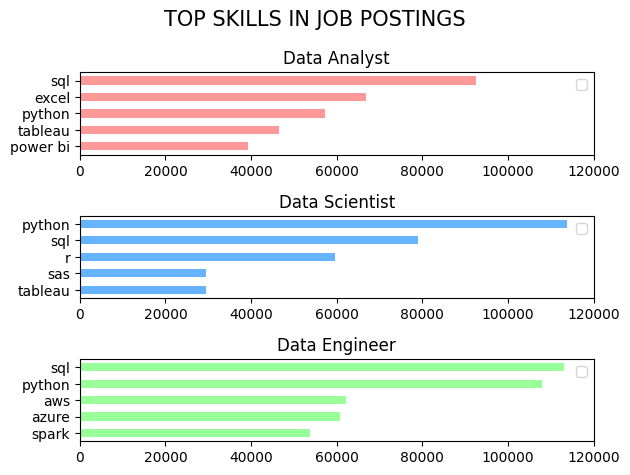

In [84]:
# kita ambil Data Analyst, Data Engineer dan Data Scientist
job_titles = ['Data Analyst','Data Scientist','Data Engineer']
fig, ax = plt.subplots(3,1)
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short']==job_title].head()
    df_plot.plot(kind='barh', x='job_skills',y='skill_count', ax=ax[i], title=job_title, color=colors[i])
    ax[i].invert_yaxis()
    ax[i].legend('')
    ax[i].set_ylabel('')
    ax[i].set_xlim(0, 120000)

fig.suptitle('TOP SKILLS IN JOB POSTINGS', fontsize=15)
fig.tight_layout()

## Pie Chart

#### Pie Chart adalah jenis visualisasi data yang menampilkan proporsi atau persentase dari keseluruhan kategori. 

#### Untuk contoh saya akan menganalisa berapa jumlah job posting yang menawarkan Work From Home dan yang bukan Work From Home

Text(0.5, 1.0, 'WFH Status')

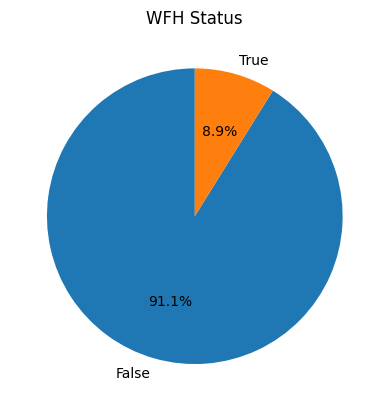

In [85]:
df['job_work_from_home'].value_counts(ascending=False).plot(kind='pie', startangle=90, autopct="%1.1f%%")
plt.ylabel('')
plt.title('WFH Status')

Text(0.5, 1.0, 'Job Titles')

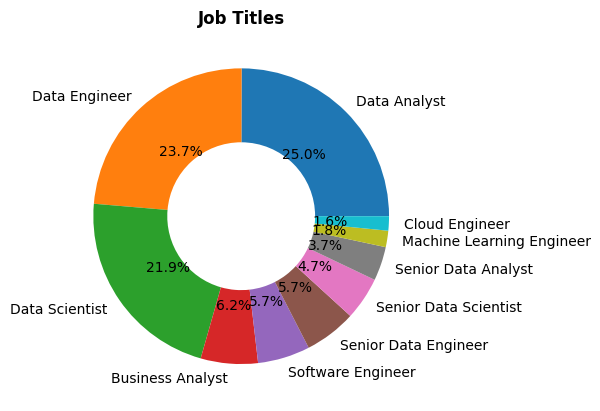

In [86]:
df['job_title_short'].value_counts(ascending=False).plot(kind='pie', wedgeprops=dict(width=0.5), autopct='%1.1f%%',textprops={'fontsize': 10})
plt.ylabel('')
plt.title('Job Titles', fontweight='bold')

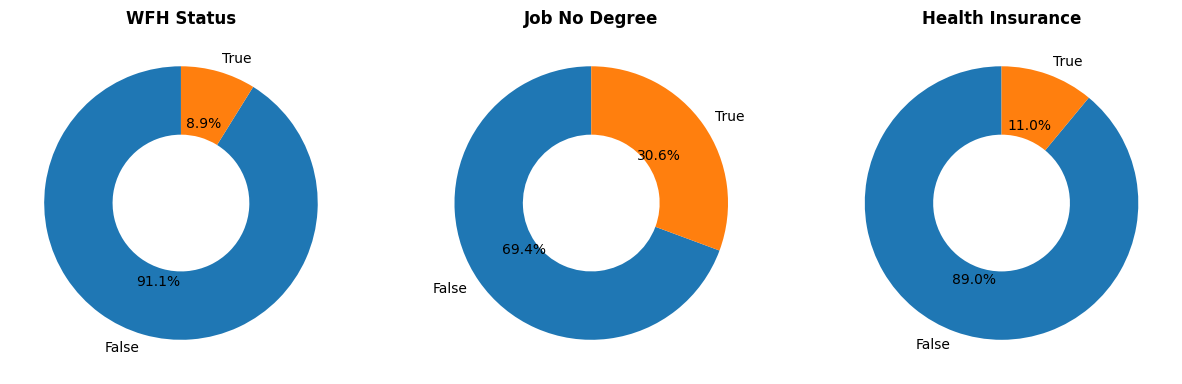

In [87]:
fig, ax = plt.subplots(1,3, figsize=(15,8))
dict_columns = {
                'job_work_from_home': 'WFH Status',
                'job_no_degree_mention': 'Job No Degree',
                'job_health_insurance': 'Health Insurance'}

for i,(column, title) in enumerate(dict_columns.items()):
    ax[i].pie(df[column].value_counts(), autopct='%1.1f%%', labels=['False','True'], wedgeprops=dict(width=0.5),startangle=90)
    ax[i].set_title(title, fontweight='bold')

## Scatter plot

#### Scatter plot digunakan untuk memvisualisasikan hubungan antara dua variabel numerik. 

#### Saya akan mencoba mencari salary dan total job_skill menggunakan scatter plot

In [88]:
df_scatter = df[df['job_title_short']=='Data Analyst']
df_scatter_explode = df_scatter.explode('job_skills')
df_scatter_explode.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",Jan
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",Jan
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",Jan
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,nosql,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",Jan
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,power bi,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",Jan


In [89]:
df_scatter_explode.groupby('job_skills').agg(
    skill_count = ('job_skills','count'),
    median_salary = ('salary_year_avg', 'median')
)

,skill_count,median_salary
job_skills,,
airflow,2002,111175.0
airtable,88,90000.0
alteryx,4570,105000.0
angular,376,109101.0
angular.js,2,NaN
...,...,...
wrike,39,75000.0
wsl,16,NaN
xamarin,2,NaN


In [90]:
df_stats = df_scatter_explode.groupby('job_skills').agg(
    skill_count = ('job_skills','count'),
    median_salary = ('salary_year_avg', 'median')
)
df_stats.sort_values(by='skill_count',ascending=False).head(10)

,skill_count,median_salary
job_skills,,
sql,92428,92500.0
excel,66860,84479.0
python,57190,98500.0
tableau,46455,95000.0
power bi,39380,90000.0
r,29996,92527.5
sas,27998,90000.0
powerpoint,13822,85000.0
word,13562,80000.0


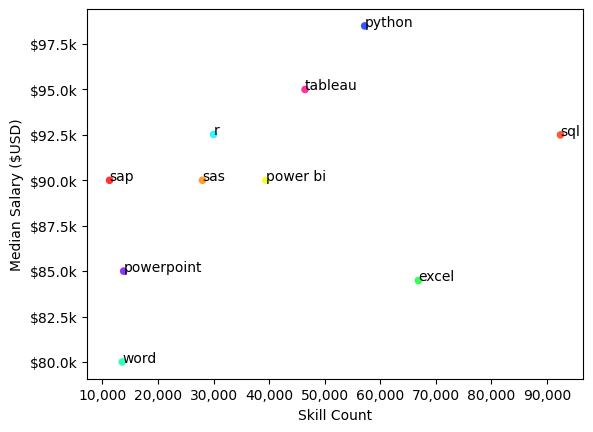

In [91]:
df_stats = df_stats.sort_values(by='skill_count',ascending=False).head(10)
colors = [
    "#FF5733",  # Orange Red
    "#33FF57",  # Lime Green
    "#3357FF",  # Blue
    "#FF33A1",  # Hot Pink
    "#F3FF33",  # Yellow
    "#33F4FF",  # Cyan
    "#FF9D33",  # Light Orange
    "#8D33FF",  # Purple
    "#33FFB5",  # Aquamarine
    "#FF3333"   # Red
]

df_stats.plot(kind='scatter', x='skill_count', y='median_salary', color=colors)
plt.xlabel('Skill Count')
plt.ylabel('Median Salary ($USD)')

for i,txt in enumerate(df_stats.index):
    # print(i,txt)
    plt.text(df_stats['skill_count'].iloc[i], df_stats['median_salary'].iloc[i], txt)

# mengubah format yaxis
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${y/1000}k'))

# mengubah format xaxis
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))


## Histogram

#### Histogram adalah jenis grafik yang digunakan untuk menunjukkan distribusi frekuensi dari data numerik dengan membagi data ke dalam interval atau "bins" dan menghitung berapa banyak data yang berada dalam setiap interval.

#### untuk contoh saya akan menganalisis bagaimana gaji tahunan para analis data di Amerika Serikat tersebar atau didistribusikan

Text(0.5, 1.0, 'Distribution of United States Data Analyst Yearly Salaries')

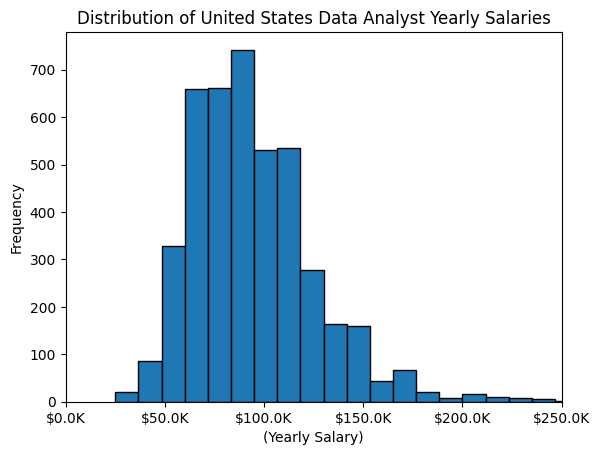

In [92]:
df_hist = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country']=='United States')].copy()
df_hist['salary_year_avg'].plot(kind='hist', bins=30, edgecolor='#000000')

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x/1000}K'))
plt.xlabel('(Yearly Salary)')
plt.xlim(0, 250000)
plt.title('Distribution of United States Data Analyst Yearly Salaries')

## Box Plots

#### Grafik box plot (atau box-and-whisker plot) digunakan untuk menggambarkan distribusi data melalui lima statistik ringkasan utama dan mengidentifikasi outlier. 

In [93]:
job_titles = ['Data Analyst','Data Engineer', 'Data Scientist']
df_box = df[(df['job_title_short'].isin(job_titles)) & (df['job_country']=='United States')].copy()

df_box = df_box.dropna(subset=['salary_year_avg'])

df_box_list = [df_box[df_box['job_title_short']==job_title]['salary_year_avg'] for job_title in job_titles]
df_box_list

[109        89000.0
 180        90250.0
 410       133285.0
 988        62623.0
 1413       71300.0
             ...   
 782637     70000.0
 782798    111175.0
 783588    125000.0
 783866    115000.0
 784882     87500.0
 Name: salary_year_avg, Length: 4350, dtype: float64,
 92        120000.0
 146       129500.0
 307       185000.0
 339       195000.0
 380        97500.0
             ...   
 783111    125000.0
 784102     90000.0
 784191    217500.0
 785624    139216.0
 785641    150000.0
 Name: salary_year_avg, Length: 2915, dtype: float64,
 100       228222.0
 116       114000.0
 257       103128.0
 450       157500.0
 1257       70700.0
             ...   
 785324    234500.0
 785488    115000.0
 785563    136400.0
 785648    221875.0
 785692    157500.0
 Name: salary_year_avg, Length: 4553, dtype: float64]

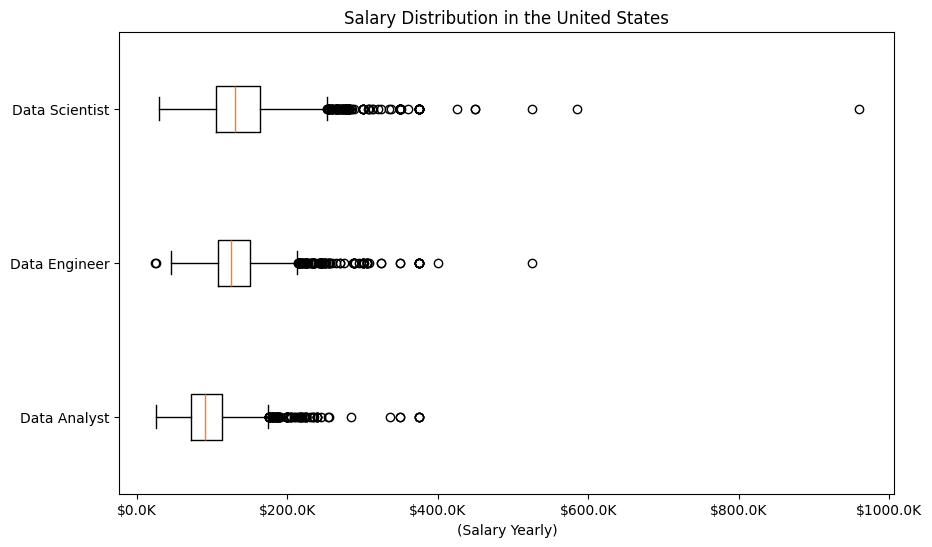

In [94]:
plt.figure(figsize=(10,6))
plt.boxplot(df_box_list, labels=job_titles, vert=False)
plt.xlabel('(Salary Yearly)')
plt.title('Salary Distribution in the United States')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x/1000}K'))
plt.show()

## Kita akan coba menganalisa salary tertinggi dan juga mencari permintaan skills terbanyak

In [95]:
df_final = df_hist
df_final = df.explode('job_skills')
df_final= df_final[['job_skills','salary_year_avg']]
df_final = df_final.dropna(subset=['salary_year_avg'])
df_final

,job_skills,salary_year_avg
28,gdpr,109500.0
28,excel,109500.0
77,mongodb,140000.0
77,mongodb,140000.0
77,python,140000.0
...,...,...
785682,airflow,157500.0
785682,kubernetes,157500.0
785692,python,157500.0
785692,matlab,157500.0


In [96]:
df_final.groupby('job_skills')['salary_year_avg'].agg(['count','median'])

,count,median
job_skills,,
airflow,1497,147090.500000
airtable,22,102500.000000
alteryx,386,115000.000000
angular,113,130000.000000
angular.js,2,127050.000000
...,...,...
workfront,8,93480.054688
wrike,2,101250.000000
xamarin,2,121250.000000


In [97]:
df_final_groupby = df_final.groupby('job_skills')['salary_year_avg'].agg(['count','median'])

df_final_top_pay = df_final_groupby.sort_values(by='median',ascending=False).head(10)
df_final_top_pay

,count,median
job_skills,,
debian,1,196500.0
ringcentral,2,182500.0
mongo,256,173500.0
lua,1,170500.0
watson,31,157500.0
dplyr,19,157500.0
haskell,3,157500.0
hugging face,37,157500.0
asp.net core,1,155000.0


In [98]:
df_final_top_demand = df_final_groupby.sort_values(by='count', ascending=False).sort_values(by='count', ascending=False)
df_final_top_demand = df_final_top_demand.head(10).sort_values(by='median', ascending=False)
df_final_top_demand

,count,median
job_skills,,
spark,4016,140000.0
aws,4949,135000.0
java,2756,134241.0
python,12869,125000.0
azure,3466,125000.0
sql,12951,120000.0
r,5088,119550.0
tableau,4814,111175.0
sas,3132,110000.0


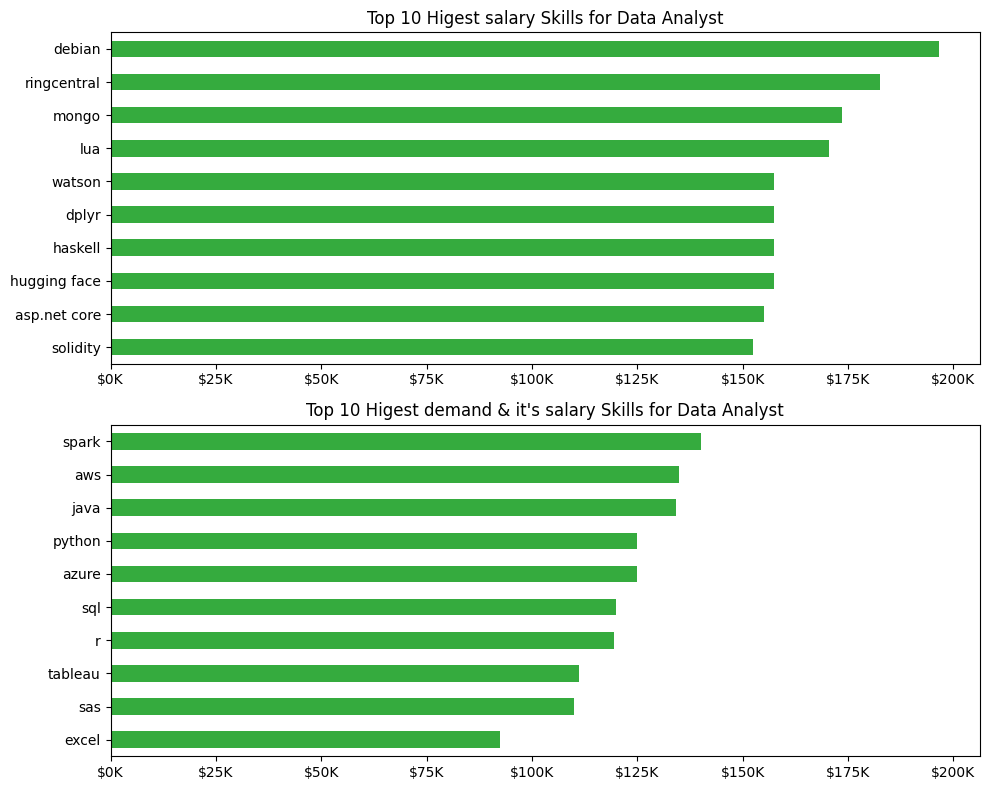

In [99]:

fig, ax = plt.subplots(2,1, figsize=(10,8))

df_final_top_pay.plot(kind='barh', y='median', ax=ax[0], legend=False, color='#35ab3e')
ax[0].invert_yaxis()
ax[0].set_title('Top 10 Higest salary Skills for Data Analyst')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

df_final_top_demand.plot(kind='barh', y='median', ax=ax[1], legend=False, color='#35ab3e')
ax[1].invert_yaxis()
ax[1].set_title("Top 10 Higest demand & it's salary Skills for Data Analyst")
ax[1].set_ylabel('')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

fig.tight_layout()


## Seabron

#### Kita dapat menggunakan Seaborn untuk menghias tampilan dari graik yang kita buat

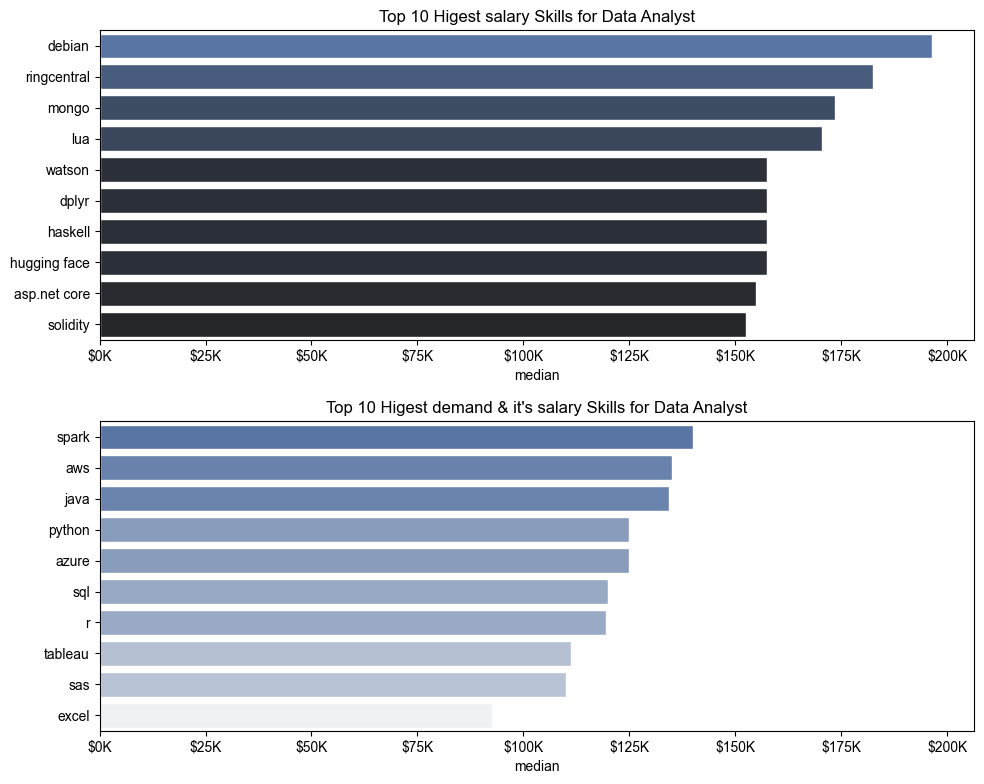

In [100]:

fig, ax = plt.subplots(2,1, figsize=(10,8))
sns.set_theme(style='ticks')

# df_final_top_pay.plot(kind='barh', y='median', ax=ax[0], legend=False, color='#35ab3e')
sns.barplot(data=df_final_top_pay, x='median', y=df_final_top_pay.index, ax=ax[0], hue='median', palette='dark:b')
# ax[0].invert_yaxis()
ax[0].set_title('Top 10 Higest salary Skills for Data Analyst')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
ax[0].legend().remove()

# df_final_top_demand.plot(kind='barh', y='median', ax=ax[1], legend=False, color='#35ab3e')
sns.barplot(data=df_final_top_demand, x='median', y=df_final_top_demand.index, ax=ax[1], hue='median', palette='light:b')
# ax[1].invert_yaxis()
ax[1].set_title("Top 10 Higest demand & it's salary Skills for Data Analyst")
ax[1].set_ylabel('')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
ax[1].legend().remove()

fig.tight_layout()


## Hist Original

#### merubah Histogram yang sudah kita buat sebelumnya menjadi lebih halus

Text(0.5, 1.0, 'Distribution of United States Data Analyst Yearly Salaries')

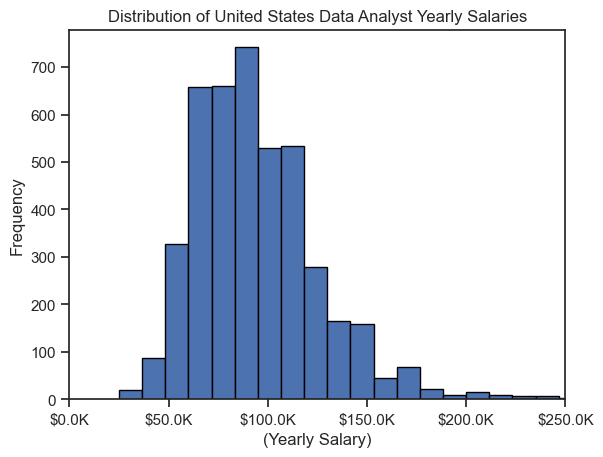

In [101]:
df_hist = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country']=='United States')].copy()
df_hist['salary_year_avg'].plot(kind='hist', bins=30, edgecolor='#000000')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x/1000}K'))
plt.xlabel('(Yearly Salary)')
plt.xlim(0, 250000)
plt.title('Distribution of United States Data Analyst Yearly Salaries')

## seaborn version

Text(0.5, 1.0, 'Distribution of United States Data Analyst Yearly Salaries')

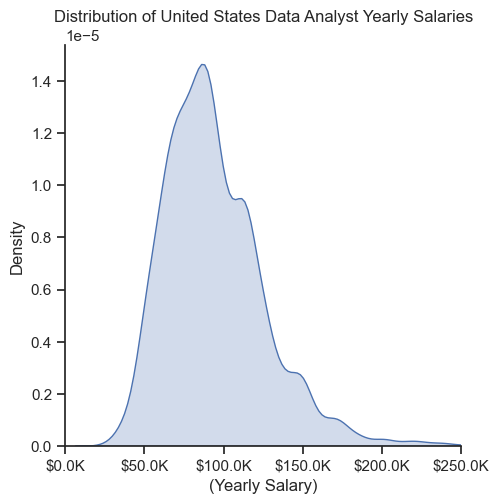

In [102]:
# df_hist = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country']=='United States')].copy()
# df_hist['salary_year_avg'].plot(kind='hist', bins=30, edgecolor='#000000')
sns.displot(df_hist['salary_year_avg'], kind='kde', fill=True)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x/1000}K'))
plt.xlabel('(Yearly Salary)')
plt.xlim(0, 250000)
plt.title('Distribution of United States Data Analyst Yearly Salaries')

## Boxplot Original

#### menambahkan warna supaya lebih enak untuk dilihat

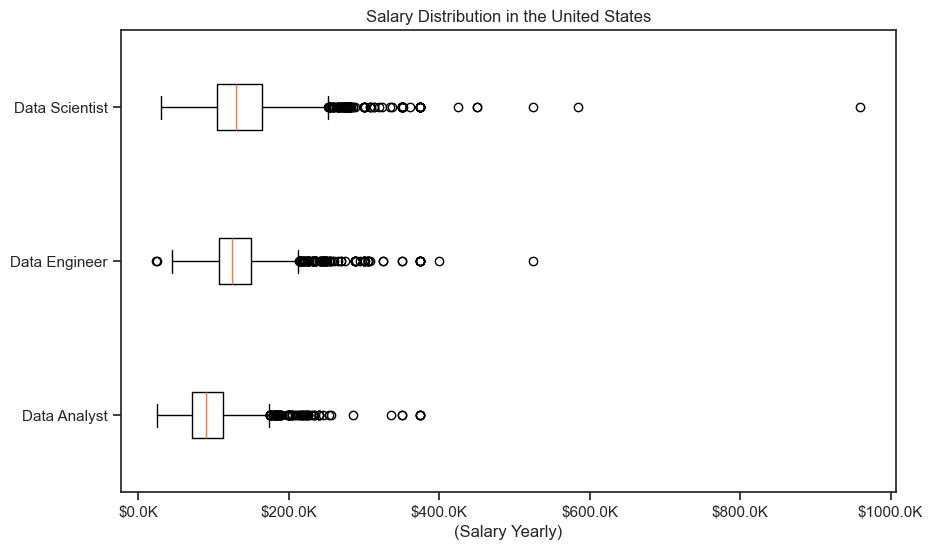

In [103]:
plt.figure(figsize=(10,6))
plt.boxplot(df_box_list, labels=job_titles, vert=False)
plt.xlabel('(Salary Yearly)')
plt.title('Salary Distribution in the United States')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x/1000}K'))
plt.show()

## seaborn version

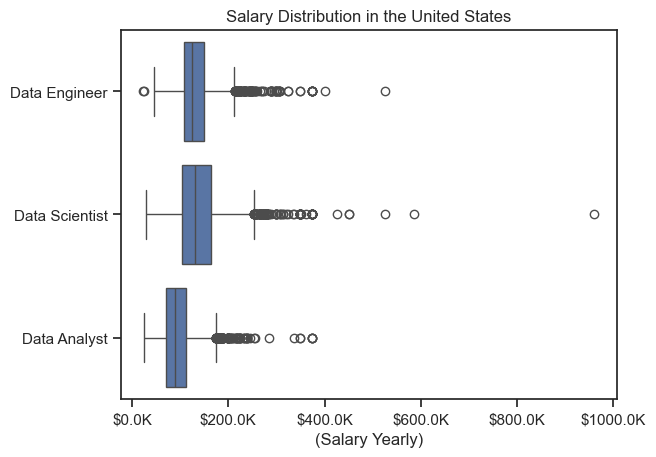

In [104]:
sns.boxplot(data=df_box, x='salary_year_avg', y='job_title_short')
plt.xlabel('(Salary Yearly)')
plt.ylabel('')
plt.title('Salary Distribution in the United States')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x/1000}K'))
plt.show()